In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/akshaybhalotia/yc_company_scraper/main/data/yc_essential_data.csv'
dirty_data = pd.read_csv(url)

In [ ]:
dirty_data.info

<bound method DataFrame.info of          id             name             slug            former_names  \
0       370            Wufoo            wufoo                      []   
1       369  Project Wedding  project-wedding                      []   
2       367         Clustrix         clustrix                      []   
3       366          Inkling          inkling                      []   
4       372        Audiobeta        audiobeta                      []   
...     ...              ...              ...                     ...   
4412  22673        Gigs Live        gigs-live  ["TXL Technology Inc"]   
4413  22664     SBX Robotics     sbx-robotics                      []   
4414  22652        Playmaker        playmaker                      []   
4415  22600        Neverland        neverland                      []   
4416  22565           Gonddo           gonddo                      []   

                                   small_logo_thumb_url  \
0     https://bookface-images.s3

In [ ]:
labels = ['app_video_public', 'demo_day_video_public', 'app_answers', 'question_answers', 'former_names',
           'highlight_black', 'top_company', 'top_company_by_revenue', 'isHiring', 'nonprofit', 'tags_highlighted',
          'highlight_latinx', 'small_logo_thumb_url', 'highlight_women', 'launched_at', 'long_description', 'objectID']

data = dirty_data.drop(labels, axis=1)

data = data.drop(data[data['tags'].map(lambda d: len(d) == 2)].index, axis=0)

In [ ]:
print((data['all_locations'].values[0]).split(";")[0].split(" ")[-1])
print(data.regions.shape[0])

USA
4053


In [ ]:
data = data.astype({"industry": str, "all_locations": str})

In [ ]:
data['country'] = data.regions
for i in range(data.regions.shape[0]):
  data['country'].values[i] = (data['all_locations'].values[i]).split(";")[0].split(" ")[-1]

data.info

<bound method DataFrame.info of          id             name             slug                         website  \
0       370            Wufoo            wufoo                http://wufoo.com   
6       368         Snipshot         snipshot            https://snipshot.com   
7       282  Poll Everywhere  poll-everywhere  https://www.polleverywhere.com   
8       291         BackType         backtype             http://backtype.com   
9       289      JustSpotted      justspotted          http://justspotted.com   
...     ...              ...              ...                             ...   
4412  22673        Gigs Live        gigs-live               https://gigs.live   
4413  22664     SBX Robotics     sbx-robotics    https://www.sbxrobotics.com/   
4414  22652        Playmaker        playmaker         http://getplaymaker.app   
4415  22600        Neverland        neverland  http://www.enterneverland.com/   
4416  22565           Gonddo           gonddo          https://gonddo.com.br/

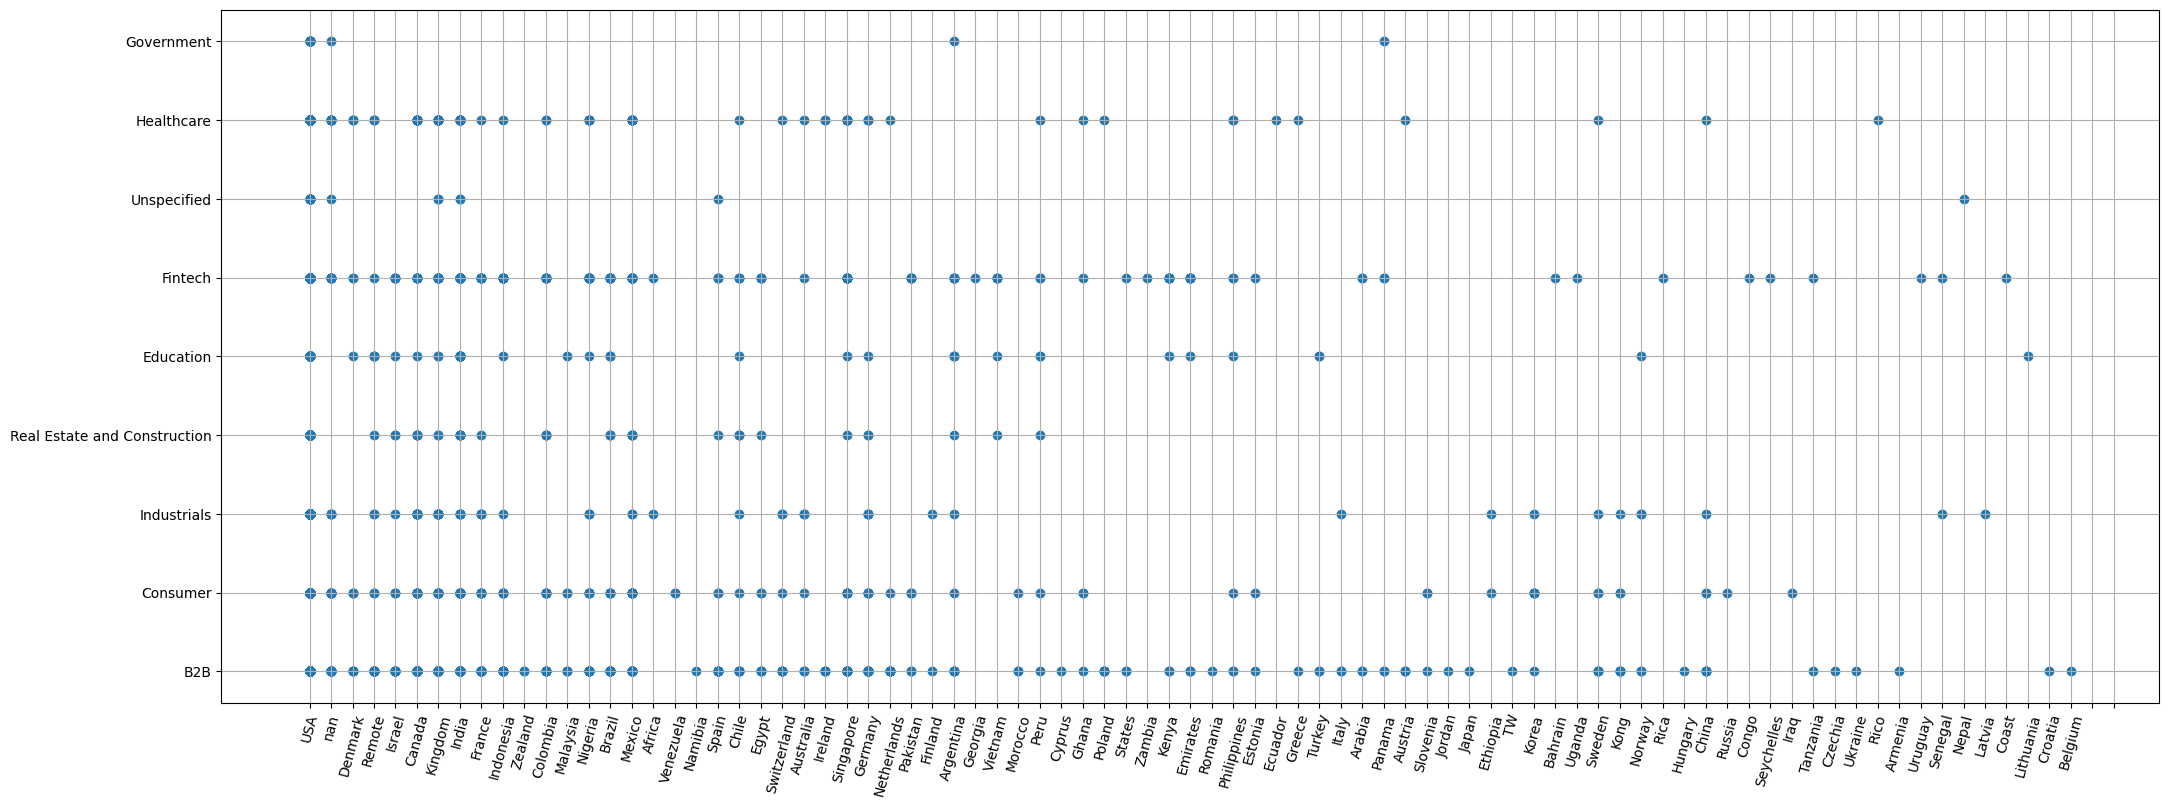

In [ ]:
plt.figure(figsize=(25, 9))
plt.scatter(x=data['country'].values[:],
            y=data['industry'].values[:])
plt.xticks(np.arange(0, 85, 1.0), rotation=75)
plt.grid()
plt.show()

In [ ]:
tags = set()
for i in range(data.tags.shape[0]):
  tags.update(set(literal_eval(data.tags.values[i])))

print(tags)

{"Women's Health", 'Consumer Products', 'Enterprise', 'Sustainable Tourism', 'Remote Work', 'Airlines', 'Immigration', 'Coding Bootcamps', 'Data Science', 'AI Assistant', 'Media', 'Chat', 'Investing', 'Civic Tech', 'Apparel', 'Customization', 'Social Network', 'Cannabis', 'Psychedelics', '3D Printed Foods', 'Oncology', 'Retail', 'Speech Recognition', 'Workflow Automation', 'Femtech', 'Housing', 'E-commerce', 'Cashierless Checkout', 'Developer Tools', 'Dental', 'Edtech', 'Enterprise Software', 'Fertility Tech', 'Trading', 'SMB', 'NLP', 'Alternative Fuels', 'Latin America', 'Food Service Robots & Machines', 'DevOps', 'Legal', 'Computational Storage', 'Design', 'Banking as a Service', 'Culture', 'Sustainable Fashion', 'Team Collaboration', 'Robotic Process Automation', 'Mental Health Tech', 'Telemedicine', 'Databases', 'Logistics', 'Energy Storage', 'Biometrics', 'Unmanned Vehicle', 'Nanotechnology', 'Data Engineering', 'Customer Service', 'International', 'Chatbot', 'Beauty', 'Autonomous

In [ ]:
tags = list(tags)
print(tags)

["Women's Health", 'Consumer Products', 'Enterprise', 'Sustainable Tourism', 'Remote Work', 'Airlines', 'Immigration', 'Coding Bootcamps', 'Data Science', 'AI Assistant', 'Media', 'Chat', 'Investing', 'Civic Tech', 'Apparel', 'Customization', 'Social Network', 'Cannabis', 'Psychedelics', '3D Printed Foods', 'Oncology', 'Retail', 'Speech Recognition', 'Workflow Automation', 'Femtech', 'Housing', 'E-commerce', 'Cashierless Checkout', 'Developer Tools', 'Dental', 'Edtech', 'Enterprise Software', 'Fertility Tech', 'Trading', 'SMB', 'NLP', 'Alternative Fuels', 'Latin America', 'Food Service Robots & Machines', 'DevOps', 'Legal', 'Computational Storage', 'Design', 'Banking as a Service', 'Culture', 'Sustainable Fashion', 'Team Collaboration', 'Robotic Process Automation', 'Mental Health Tech', 'Telemedicine', 'Databases', 'Logistics', 'Energy Storage', 'Biometrics', 'Unmanned Vehicle', 'Nanotechnology', 'Data Engineering', 'Customer Service', 'International', 'Chatbot', 'Beauty', 'Autonomous

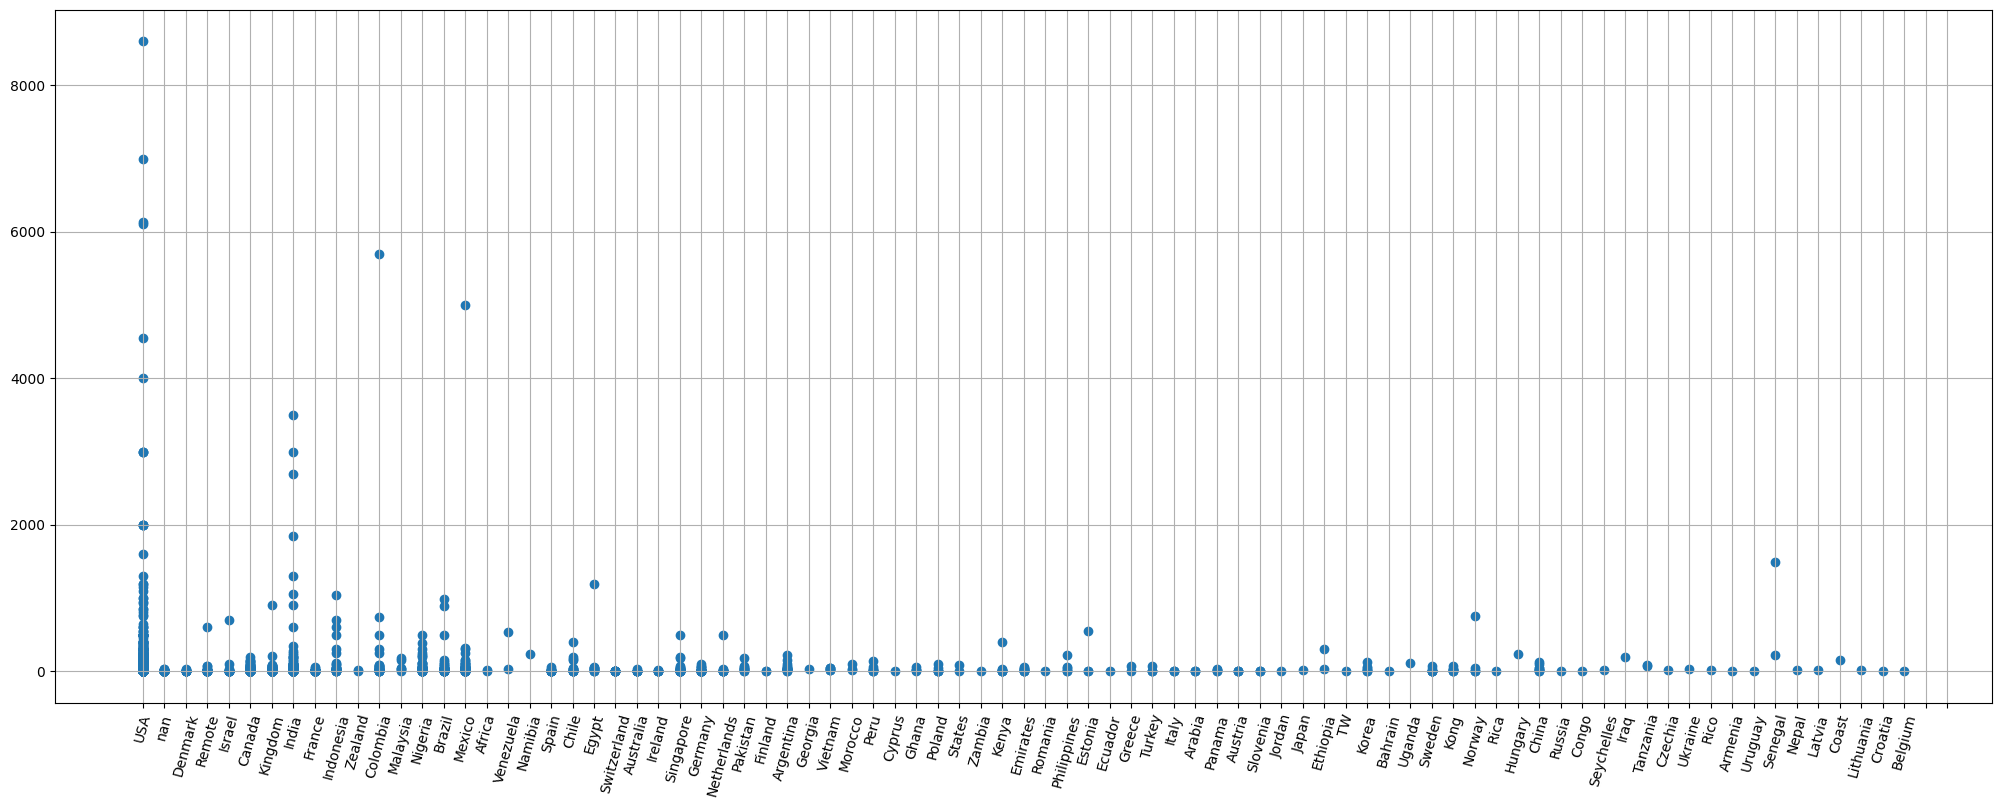

In [ ]:
plt.figure(figsize=(25, 9))
plt.scatter(data['country'].values[:], data['team_size'].values[:])
plt.xticks(np.arange(0, 85, 1.0), rotation=75)
plt.grid()
plt.show()

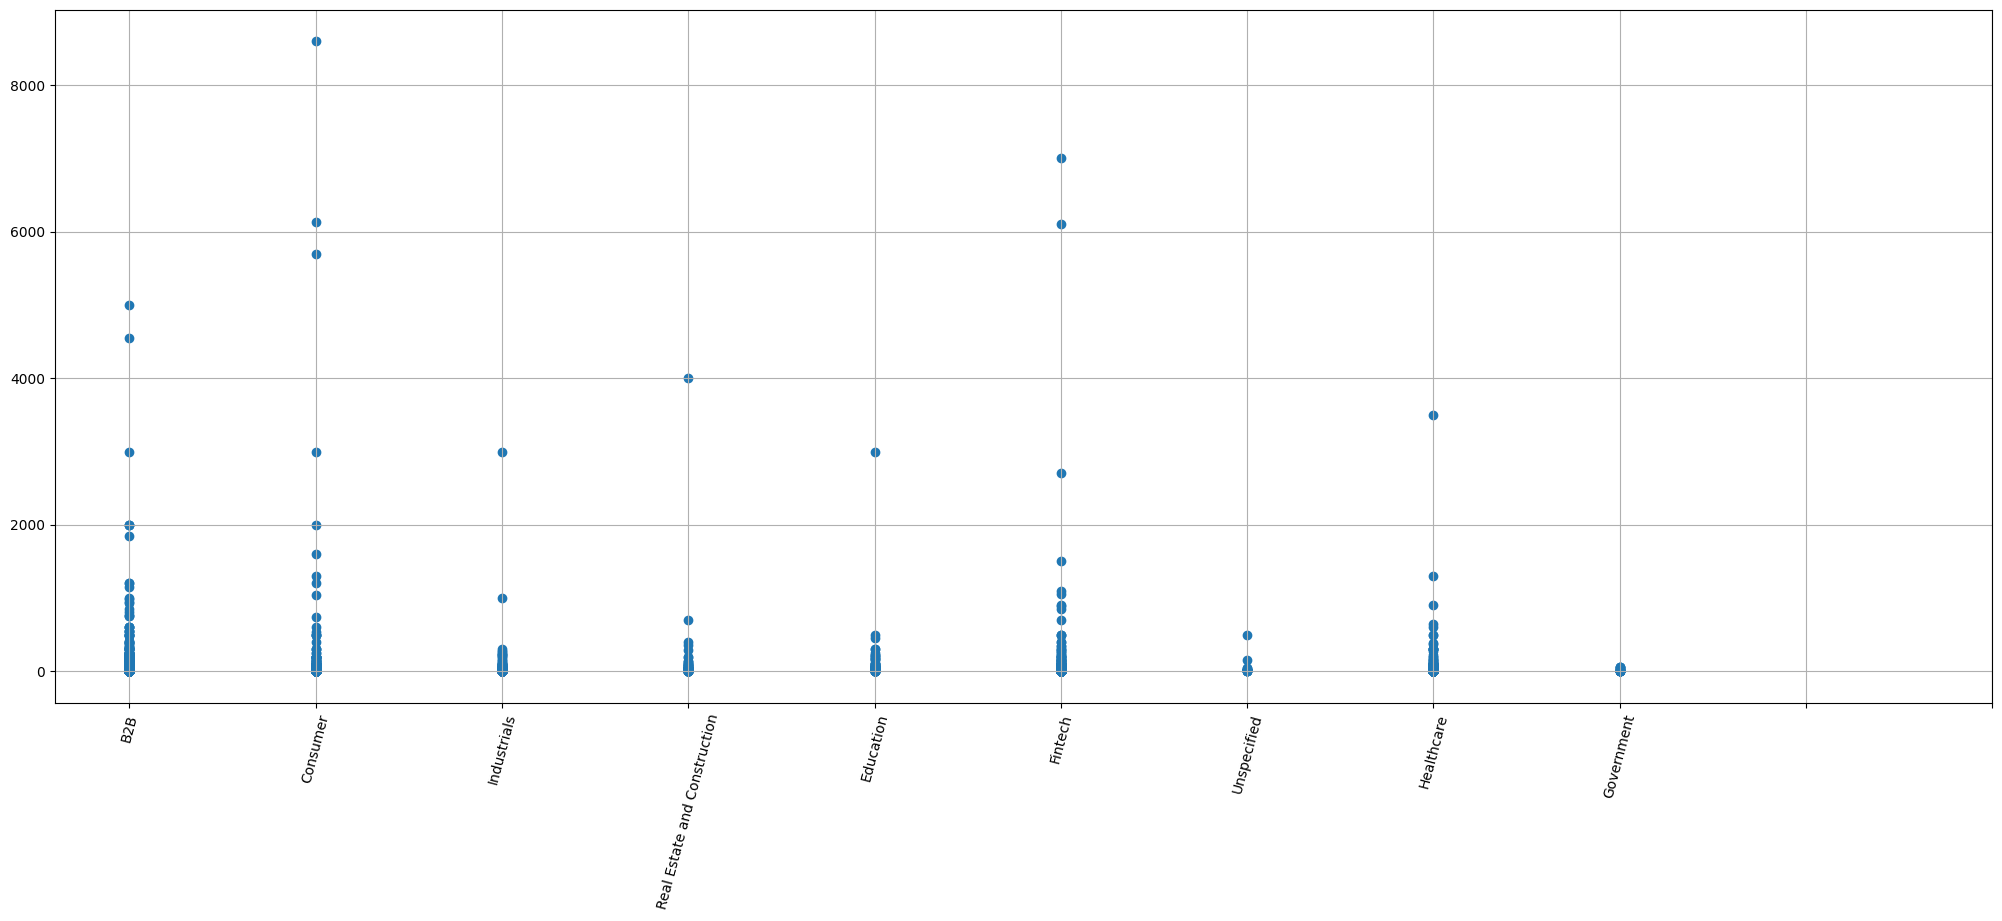

In [ ]:
plt.figure(figsize=(25, 9))
plt.scatter(data['industry'].values[:], data['team_size'].values[:])
plt.xticks(np.arange(0, 11, 1.0), rotation=75)
plt.grid()
plt.show()

In [ ]:
def plot_tags_emp(bucket_sz):
  for i in range(0, len(tags)//bucket_sz, bucket_sz):
    plt.figure(figsize=(25, 9))
    plt.scatter(tags[i : i + bucket_sz], data['team_size'].values[i : i + bucket_sz])
    plt.xticks(np.arange(0, bucket_sz, 1.0), rotation=75)
    plt.grid()
    plt.show()

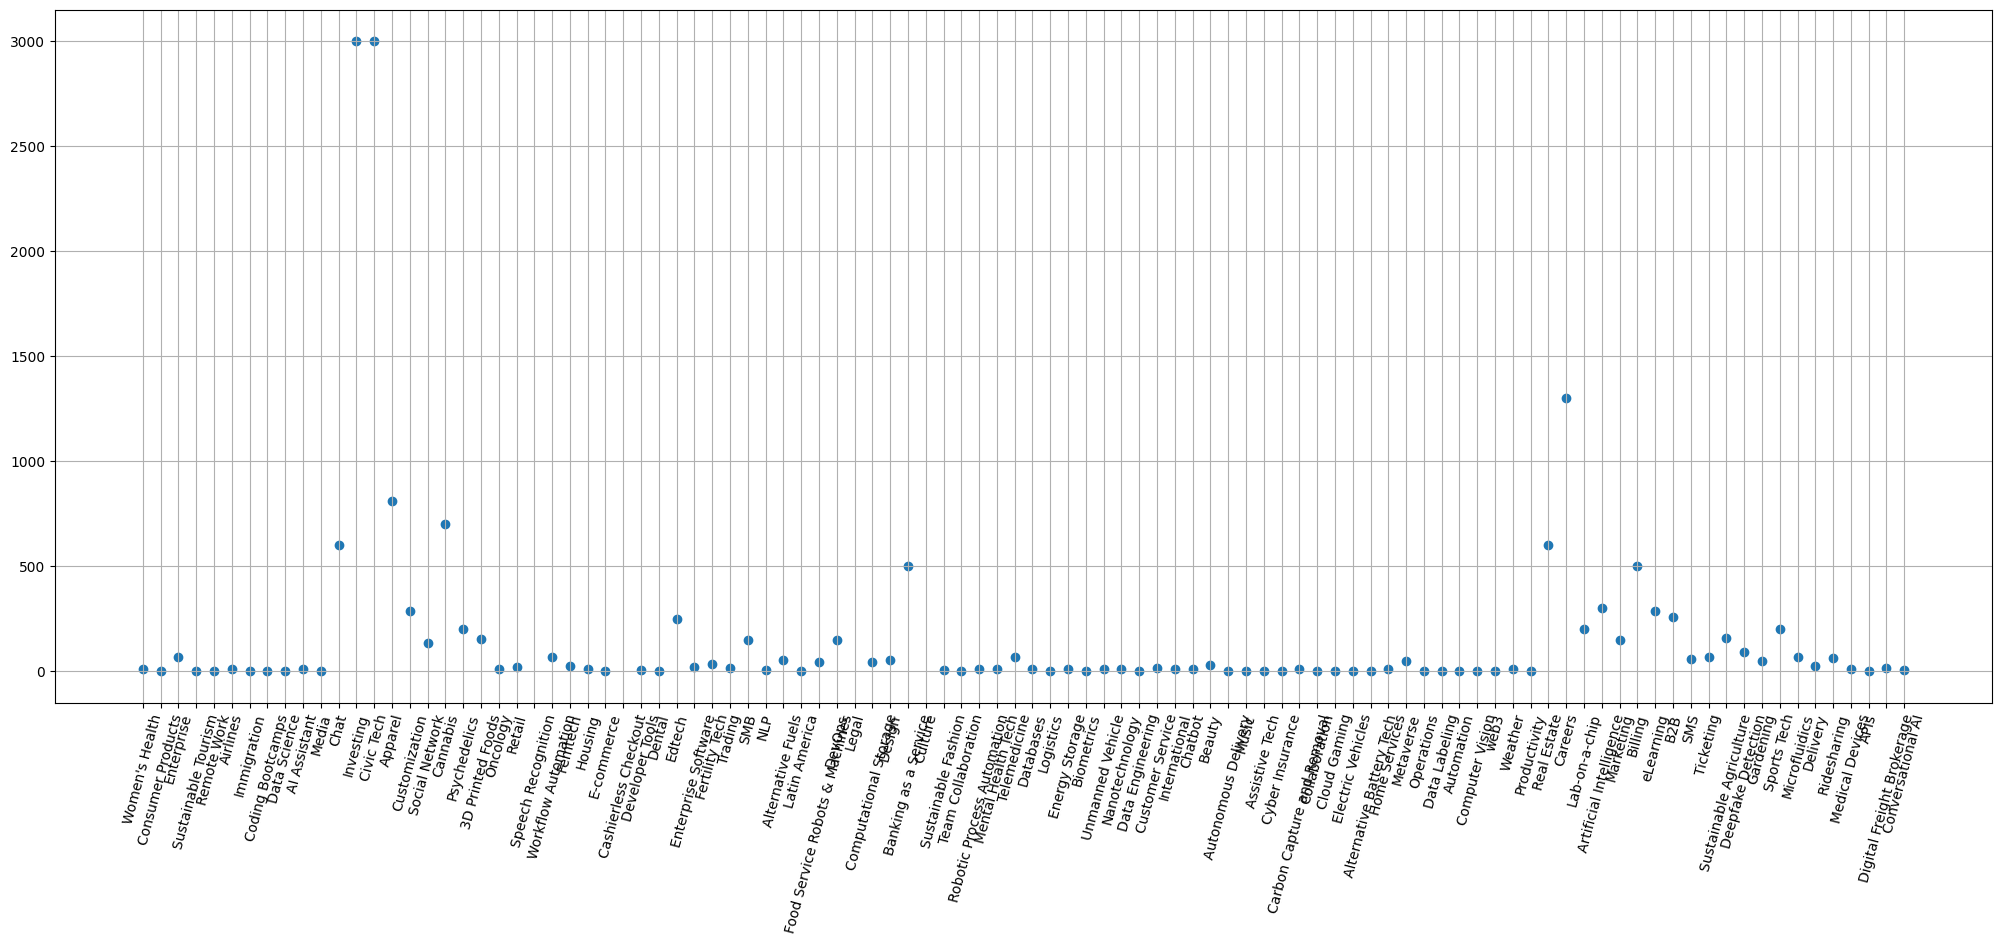

In [ ]:
plot_tags_emp(100)